# 1. Syntax

In [1]:
import pandas as pd

In [9]:
df = pd.DataFrame({"a" : [4, 5, 6],
                  "b" : [7, 8, 9],
                  "c" : [10, 11, 12]},
                 index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [11]:
df['a'] # 특정 열
df[['a','b']]
df.loc[2]  #특정 행

a     5
b     8
c    11
Name: 2, dtype: int64

In [12]:
df.loc[3,'a']

6

In [16]:
df.loc[[1,3],['a','b']]

,a,b
1,4,7
3,6,9


In [19]:
df2 = pd.DataFrame([[4, 7, 10],
                    [5, 8, 11],
                    [6, 9, 12]], 
                   index=[11, 12, 13], 
                   columns=['a', 'b', 'c'])
df2

,a,b,c
11,4,7,10
12,5,8,11
13,6,9,12


In [18]:
df3 = pd.DataFrame({"a" : [4 ,5, 6], 
                   "b" : [7, 8, 9], 
                   "c" : [10, 11, 12]}, 
                  index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)],names=['n','v']))
df3

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

# 2. Reshaping Data

In [20]:
pd.melt?

In [21]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [22]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [23]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [24]:
# pivot

df.pivot?

In [26]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [27]:
df.pivot(index='foo', columns='bar', values=['baz','zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [28]:
# concat

pd.concat?

In [40]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [41]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [33]:
#pd.concat([df1,df2])
pd.concat([df1,df2],ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [32]:
pd.concat([df1,df2],axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [34]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [36]:
df.sort_values('zoo', ascending=False)   # ascending=False : 내림차순

,foo,bar,baz,zoo
2,one,C,3,z
1,one,B,2,y
0,one,A,1,x
4,two,B,5,w
5,two,C,6,t
3,two,A,4,q


In [37]:
df.rename(columns = {'foo':'year'})

,year,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [38]:
df = pd.DataFrame([1,2,3,4,5], index=[32, 4, 56, 244, 21], columns=['data'])
df

,data
32,1
4,2
56,3
244,4
21,5


In [39]:
df.sort_index()

,data
4,2
21,5
32,1
56,3
244,4


In [40]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [41]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [42]:
pd.concat([df1,df2]).reset_index()

,index,letter,number
0,0,a,1
1,1,b,2
2,0,c,3
3,1,d,4


In [51]:
# drop
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=(['A','B','C','D']))
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [52]:
df.drop(['B','C'],axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [53]:
df.drop(columns=['B','C'])

,A,D
0,0,3
1,4,7
2,8,11


In [54]:
df.drop(index=[0,2])

,A,B,C,D
1,4,5,6,7


In [55]:
df.drop([0,1])

,A,B,C,D
2,8,9,10,11


# 3. Subset Observations (Rows)

In [56]:
df = pd.DataFrame({"a" : [4 ,5, 6], 
                   "b" : [7, 8, 9], 
                   "c" : [10, 11, 12]}, 
                  index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [58]:
#df['b']
df.b

1    7
2    8
3    9
Name: b, dtype: int64

In [59]:
df[df.b>7]

,a,b,c
2,5,8,11
3,6,9,12


In [60]:
df[df['c']>11]

,a,b,c
3,6,9,12


In [61]:
df = pd.DataFrame({"a" : [4 ,5, 5], 
                   "b" : [7, 8, 8], 
                   "c" : [10, 11, 11]}, 
                  index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,5,8,11


In [62]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11


In [63]:
df.drop_duplicates(keep='last')

,a,b,c
1,4,7,10
3,5,8,11


In [64]:
df = pd.DataFrame({"a" : [4 ,5, 5, 4, 7, 9], 
                   "b" : [7, 8, 8, 5, 8, 8], 
                   "c" : [10, 11, 11, 5, 2, 8]})
df

,a,b,c
0,4,7,10
1,5,8,11
2,5,8,11
3,4,5,5
4,7,8,2
5,9,8,8


In [65]:
df.sample(frac=0.5)  # frac : %  >> frac=0.5 : 50% 추출 > 6개 중에 3개 추출

,a,b,c
5,9,8,8
0,4,7,10
3,4,5,5


In [66]:
df.sample(n=2)

,a,b,c
3,4,5,5
0,4,7,10


In [67]:
df.iloc[2,1]

8

In [68]:
df.nlargest(3, 'c')  # 'c'라는 컬럼에서 상위 3개 추출

,a,b,c
1,5,8,11
2,5,8,11
0,4,7,10


In [69]:
df.nsmallest(2, 'b')

,a,b,c
3,4,5,5
0,4,7,10


# 4. subset Variables (Columns)

In [70]:
df = pd.DataFrame({"a" : [4 ,5, 5, 4, 7, 9], 
                   "b" : [7, 8, 8, 5, 8, 8], 
                   "c" : [10, 11, 11, 5, 2, 8]})
df

,a,b,c
0,4,7,10
1,5,8,11
2,5,8,11
3,4,5,5
4,7,8,2
5,9,8,8


In [71]:
df['a']

0    4
1    5
2    5
3    4
4    7
5    9
Name: a, dtype: int64

In [72]:
df[['a','b']]

,a,b
0,4,7
1,5,8
2,5,8
3,4,5
4,7,8
5,9,8


In [73]:
df.a

0    4
1    5
2    5
3    4
4    7
5    9
Name: a, dtype: int64

In [74]:
df.filter(regex='b')

,b
0,7
1,8
2,8
3,5
4,8
5,8


In [75]:
df2 = df.rename(columns={'a':'ap.ple','b':'ba.nana','c':'carrot'})
df2

,ap.ple,ba.nana,carrot
0,4,7,10
1,5,8,11
2,5,8,11
3,4,5,5
4,7,8,2
5,9,8,8


In [76]:
df2.filter(regex='\.') # '.'을 가지는 모든 문자

,ap.ple,ba.nana
0,4,7
1,5,8
2,5,8
3,4,5
4,7,8
5,9,8


In [77]:
df2.filter(regex='e$')   # 'e'로 끝나는 문자

,ap.ple
0,4
1,5
2,5
3,4
4,7
5,9


In [78]:
df2.filter(regex='^ca')

,carrot
0,10
1,11
2,11
3,5
4,2
5,8


In [79]:
df2.filter(regex='^(?!carrot$).*' )  #'carrot'을 포함하지 않는 문자

,ap.ple,ba.nana
0,4,7
1,5,8
2,5,8
3,4,5
4,7,8
5,9,8


# 5. Summarize Data

In [80]:
df.value_counts?

In [81]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                   'num_wings': [2, 0, 0, 0]},
                  index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [82]:
df.value_counts()

num_legs  num_wings
4         0            2
2         2            1
6         0            1
dtype: int64

In [99]:
df['num_legs'].value_counts()

4    2
2    1
6    1
Name: num_legs, dtype: int64

In [84]:
# len
len(df)  # row 개수

4

In [85]:
# unique
df['num_legs'].unique()

array([2, 4, 6], dtype=int64)

In [86]:
df.describe()

,num_legs,num_wings
count,4.000000,4.0
mean,4.000000,0.5
std,1.632993,1.0
min,2.000000,0.0
25%,3.500000,0.0
50%,4.000000,0.0
75%,4.500000,0.5
max,6.000000,2.0


In [87]:
df.sum()

num_legs     16
num_wings     2
dtype: int64

In [88]:
df.count()

num_legs     4
num_wings    4
dtype: int64

In [89]:
df.median()

num_legs     4.0
num_wings    0.0
dtype: float64

In [91]:
df.quantile([0.25,0.75])

,num_legs,num_wings
0.25,3.5,0.0
0.75,4.5,0.5


In [101]:
def plus2(x):
    return x+2

df['num_legs2'] = df['num_legs'].apply(plus2)
df

,num_legs,num_wings,num_legs2
falcon,2,2,4
dog,4,0,6
cat,4,0,6
ant,6,0,8


In [94]:
df.min()

num_legs     2
num_wings    0
dtype: int64

In [95]:
df.max()

num_legs     6
num_wings    2
dtype: int64

In [96]:
df.mean()

num_legs     4.0
num_wings    0.5
dtype: float64

In [97]:
df.var()

num_legs     2.666667
num_wings    1.000000
dtype: float64

In [98]:
df.std()

num_legs     1.632993
num_wings    1.000000
dtype: float64

# 6. Make New Columns

In [106]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                   'num_wings': [2, 0, 0, 0]},
                  index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [108]:
df = df.assign(num_wings2=lambda df: df.num_wings+2)
df

,num_legs,num_wings,num_wings2
falcon,2,2,4
dog,4,0,2
cat,4,0,2
ant,6,0,2


In [109]:
df['num_legs2']= df['num_legs'].apply(plus2)
df

,num_legs,num_wings,num_wings2,num_legs2
falcon,2,2,4,4
dog,4,0,2,6
cat,4,0,2,6
ant,6,0,2,8


In [110]:
pd.qcut(df.num_legs, 2, labels=False)


falcon    0
dog       0
cat       0
ant       1
Name: num_legs, dtype: int64

In [111]:
pd.qcut(df.num_legs, 2, labels=['a','b'])

falcon    a
dog       a
cat       a
ant       b
Name: num_legs, dtype: category
Categories (2, object): ['a' < 'b']

In [113]:
df.max(axis=0)

num_legs      6
num_wings     2
num_wings2    4
num_legs2     8
dtype: int64

In [114]:
df.max(axis=1)

falcon    4
dog       6
cat       6
ant       8
dtype: int64

In [115]:
df.min(axis=1)

falcon    2
dog       0
cat       0
ant       0
dtype: int64

In [116]:
df.clip(lower=3, upper=5)

,num_legs,num_wings,num_wings2,num_legs2
falcon,3,3,4,4
dog,4,3,3,5
cat,4,3,3,5
ant,5,3,3,5


# 7. Group Data

In [117]:
df = pd.read_csv('data/house_price2.csv')
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,60㎡이하,2020,2,4039
4502,제주,60㎡초과 85㎡이하,2020,2,3962
4503,제주,85㎡초과 102㎡이하,2020,2,0


In [118]:
df.groupby('지역명').sum()

,연도,월,분양가격
지역명,,,
강원,534625,1740,620049
경기,534625,1740,1079257
경남,534625,1740,731738
경북,534625,1740,644514
광주,534625,1740,649443
대구,534625,1740,937814
대전,534625,1740,656971
부산,534625,1740,975179
서울,534625,1740,1914827


In [119]:
df.groupby(by = '지역명').sum()

,연도,월,분양가격
지역명,,,
강원,534625,1740,620049
경기,534625,1740,1079257
경남,534625,1740,731738
경북,534625,1740,644514
광주,534625,1740,649443
대구,534625,1740,937814
대전,534625,1740,656971
부산,534625,1740,975179
서울,534625,1740,1914827


In [120]:
df.pivot_table(index='지역명', aggfunc='sum')

,분양가격,연도,월
지역명,,,
강원,620049,534625,1740
경기,1079257,534625,1740
경남,731738,534625,1740
경북,644514,534625,1740
광주,649443,534625,1740
대구,937814,534625,1740
대전,656971,534625,1740
부산,975179,534625,1740
서울,1914827,534625,1740


In [123]:
df2 = df.groupby(['지역명','연도']).sum()
df2

월    분양가격
지역명 연도               
강원  2015  165   32673
    2016  390  112870
    2017  390  133070
    2018  390  149441
    2019  390  162445
...       ...     ...
충북  2016  390  129697
    2017  390  135683
    2018  390  148169
    2019  390  144925
    2020   15   24457

[102 rows x 2 columns]

In [124]:
df2.groupby(level='연도').sum()

,월,분양가격
연도,,
2015,2805,677656
2016,6630,2887302
2017,6630,3064729
2018,6630,3057468
2019,6630,3368401
2020,255,585802


In [125]:
df.size   # 데이터의 총갯수

22525

In [126]:
# agg
df.agg?

In [127]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [128]:
df.agg(['sum','min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [129]:
df.agg('mean', axis=0)

A    4.0
B    5.0
C    6.0
dtype: float64

In [130]:
df.agg('mean', axis=1)

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

In [131]:
df.shift?

In [132]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [134]:
df.shift(-1)

,Col1,Col2,Col3
2020-01-01,20.0,23.0,27.0
2020-01-02,15.0,18.0,22.0
2020-01-03,30.0,33.0,37.0
2020-01-04,45.0,48.0,52.0
2020-01-05,NaN,NaN,NaN


In [135]:
df.rank?

In [136]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog', 
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [138]:
df['Number_legs'].rank(method='dense')

0    2.0
1    1.0
2    2.0
3    3.0
4    NaN
Name: Number_legs, dtype: float64

In [140]:
df['Number_legs'].rank(method='min')

0    2.0
1    1.0
2    2.0
3    4.0
4    NaN
Name: Number_legs, dtype: float64

In [141]:
df['Number_legs'].rank(pct=True)

0    0.625
1    0.250
2    0.625
3    1.000
4      NaN
Name: Number_legs, dtype: float64

In [142]:
df['Number_legs'].rank(method='first')

0    2.0
1    1.0
2    3.0
3    4.0
4    NaN
Name: Number_legs, dtype: float64

In [149]:
df.cumsum()

,Animal,Number_legs
0,cat,4.0
1,catpenguin,6.0
2,catpenguindog,10.0
3,catpenguindogspider,18.0
4,catpenguindogspidersnake,NaN


In [148]:
df.cummax()

,Animal,Number_legs
0,cat,4.0
1,penguin,4.0
2,penguin,4.0
3,spider,8.0
4,spider,NaN


In [151]:
df.cummin()

,Animal,Number_legs
0,cat,4.0
1,cat,2.0
2,cat,2.0
3,cat,2.0
4,cat,NaN


In [153]:
df['Number_legs'].cumprod()  # 누적곱

0      4.0
1      8.0
2     32.0
3    256.0
4      NaN
Name: Number_legs, dtype: float64

# 8. Combine Data Sets

In [154]:
adf = pd.DataFrame({'x1':['A','B','C'],'x2':[1,2,3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [161]:
bdf = pd.DataFrame({'x1':['A','B','D'],'x3':['T','F','T']})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [162]:
pd.concat([adf,bdf],axis=1)

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [163]:
pd.merge(adf,bdf)

,x1,x2,x3
0,A,1,T
1,B,2,F


In [164]:
pd.merge(adf,bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [166]:
pd.merge(adf,bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [167]:
pd.merge(adf,bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [168]:
pd.merge(adf,bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [169]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [170]:
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [171]:
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [172]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [173]:
ydf = pd.DataFrame({'x1':['A','B','C'],'x2':[1,2,3]})
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [174]:
zdf = pd.DataFrame({'x1':['B','C','D'],'x2':[2,3,4]})
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [175]:
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [176]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [177]:
pd.merge(ydf, zdf, how='outer', indicator=True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [178]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"')


,x1,x2,_merge
0,A,1,left_only


In [179]:
df2 = pd.merge(ydf, zdf, how='outer', indicator=True)
df2.query('x2 == 1')

,x1,x2,_merge
0,A,1,left_only


In [180]:
df2.drop(columns=['_merge'])

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [181]:
# Handling missing Data

df3 = pd.merge(adf, bdf, how='outer', on='x1')
df3

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [183]:
df3.dropna()

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F


In [184]:
df3.fillna(1000)

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,1000
3,D,1000.0,T


# 9. Windows

In [188]:
df = pd.DataFrame({'data':np.random.randn(100)},
                 index=pd.date_range('1/1/2021', periods=100))
df

,data
2021-01-01,0.408056
2021-01-02,-0.750044
2021-01-03,0.341194
2021-01-04,-0.945704
2021-01-05,-0.955567
...,...
2021-04-06,0.513762
2021-04-07,-0.205166
2021-04-08,1.158645
2021-04-09,-1.829891


<AxesSubplot:>

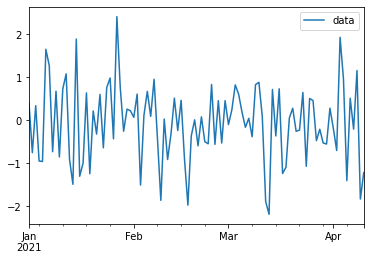

In [189]:
df.plot()

<AxesSubplot:>

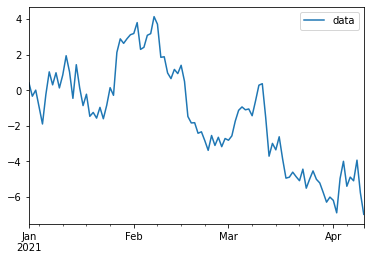

In [191]:
df.cumsum().plot()

<AxesSubplot:>

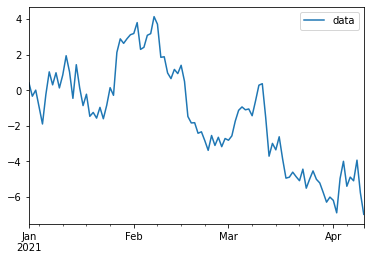

In [192]:
df.expanding().sum().plot()  # 누적합

In [193]:
df.expanding(3).sum()

,data
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,-0.000794
2021-01-04,-0.946497
2021-01-05,-1.902064
...,...
2021-04-06,-4.888299
2021-04-07,-5.093465
2021-04-08,-3.934820
2021-04-09,-5.764711


In [194]:
df2 = pd.DataFrame({'data':[0,1,2,np.nan,4]})
df2

,data
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [195]:
df2.expanding(2).sum()

,data
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


In [196]:
df2.rolling(2).sum()

,data
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [198]:
df2['rolling'] = df2.rolling(2).sum()
df2

,data,rolling
0,0.0,NaN
1,1.0,1.0
2,2.0,3.0
3,NaN,NaN
4,4.0,NaN
